# Verifica delle distorsione dello spettro #

In [65]:
import numpy as np
import matplotlib.pylab as plt

Creiamo una distribuzione random di particelle con una certa forma

In [84]:
N = 1024
M = 1024
N_part = 50
img = np.zeros((N, M))
Ampiezza = 255

for i in range(0, N_part):
    pix_x = int(N*np.random.rand())
    pix_y = int(M*np.random.rand())
    img[pix_x, pix_y] += 255#Ampiezza*np.random.poisson()


In [85]:
def conv_part_shape(N, M, sigma, Map_random):
    N=int(N)
    ones = np.ones(N)
    inds  = (np.arange(N)+.5 - N/2.) * 0.23
    X = np.outer(ones,inds)
    Y = np.transpose(X)
    R = np.sqrt(X**2. + Y**2.)
    
    #gaus_shape = np.exp(-R**2/(2*sigma))
    gaus_shape = np.zeros((N, M))
    gaus_shape[R<sigma] = 255
    
    ft_map1 = np.fft.fft2(np.fft.fftshift(Map_random))
    ft_map2 = np.fft.fft2(np.fft.fftshift(gaus_shape))
    Conv = ft_map1 * ft_map2
    map_conv = np.fft.ifftshift(np.real(np.fft.ifft2(Conv)))
    
    return np.real(map_conv)

img_gaus = conv_part_shape(N, M, 2, img)

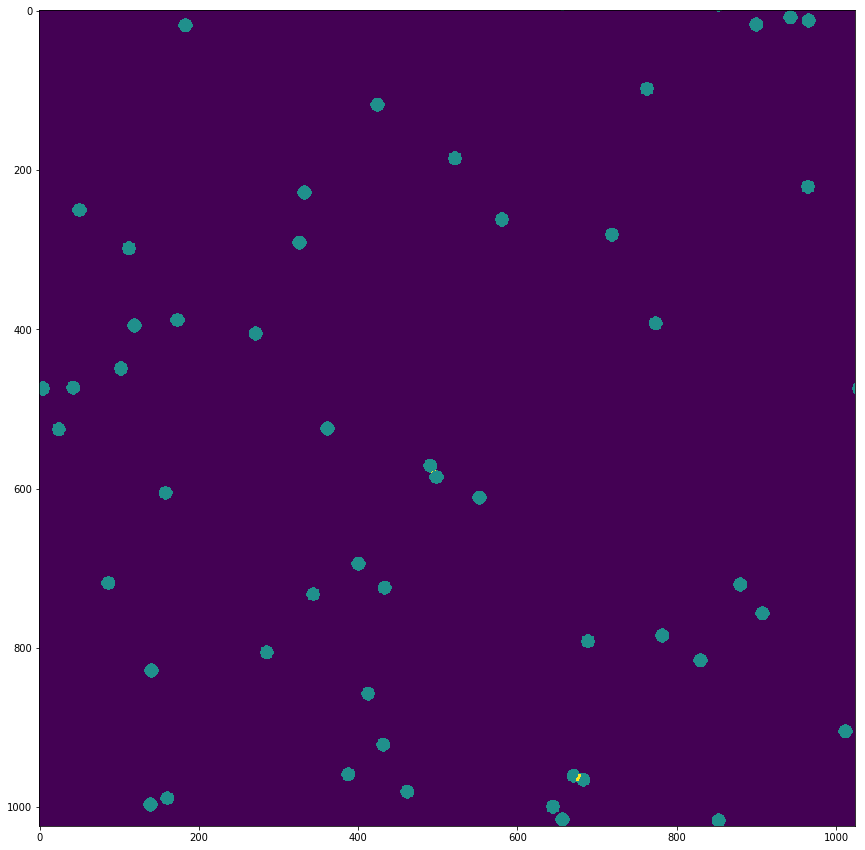

In [86]:
plt.figure(figsize=(15, 15))
plt.imshow(img_gaus)

In [87]:
img_masked = (img_gaus > 135).astype(int)

#img_gaus[img_gaus > 100] = 255
#img_gaus[img_gaus <= 100] = 0

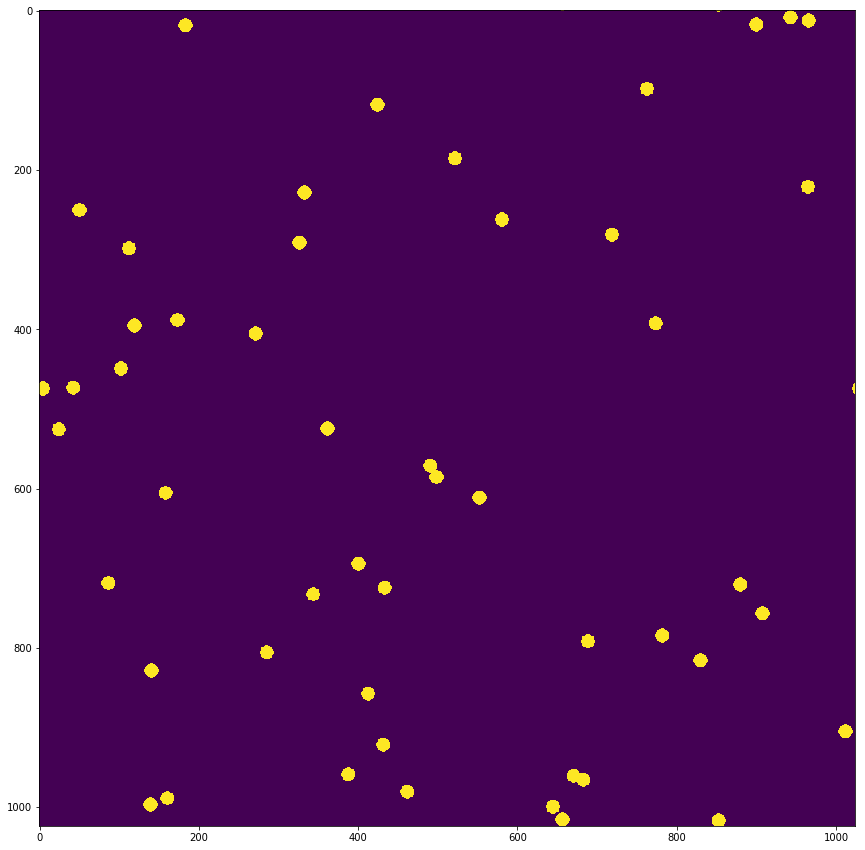

In [88]:
plt.figure(figsize=(15,15))
plt.imshow(img_masked)